<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# https://www.learnopencv.com/mask-r-cnn-instance-segmentation-with-pytorch/

In [3]:
from torchvision import models
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import random
%matplotlib inline

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
 
def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    masks = masks[:pred_t+1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return masks, pred_boxes, pred_class

def random_colour_masks(image):
    colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask

def instance_segmentation_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
    masks, boxes, pred_cls = get_prediction(img_path, threshold)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(masks)):
        rgb_mask = random_colour_masks(masks[i])
        img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
        cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
    plt.figure(figsize=(20,30))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

--2019-10-14 16:27:33--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘mrcnn_standing_people.jpg’

mrcnn_standing_peop 100%[===================>]   1.83M  5.97MB/s    in 0.3s    

2019-10-14 16:27:34 (5.97 MB/s) - ‘mrcnn_standing_people.jpg’ saved [1923610/1923610]



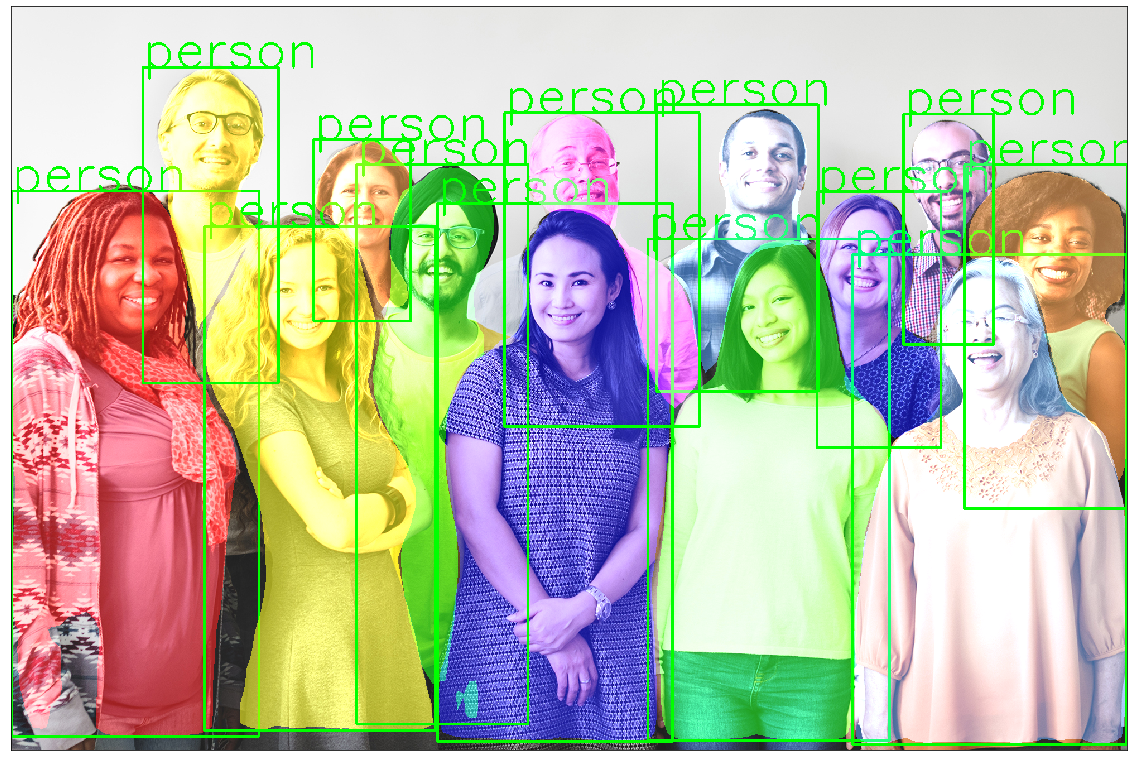

In [9]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O mrcnn_standing_people.jpg
instance_segmentation_api('./mrcnn_standing_people.jpg', 0.75)

--2019-10-14 16:28:00--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2305852 (2.2M) [image/jpeg]
Saving to: ‘mrcnn_cars.jpg’

mrcnn_cars.jpg      100%[===================>]   2.20M  --.-KB/s    in 0.1s    

2019-10-14 16:28:01 (18.4 MB/s) - ‘mrcnn_cars.jpg’ saved [2305852/2305852]



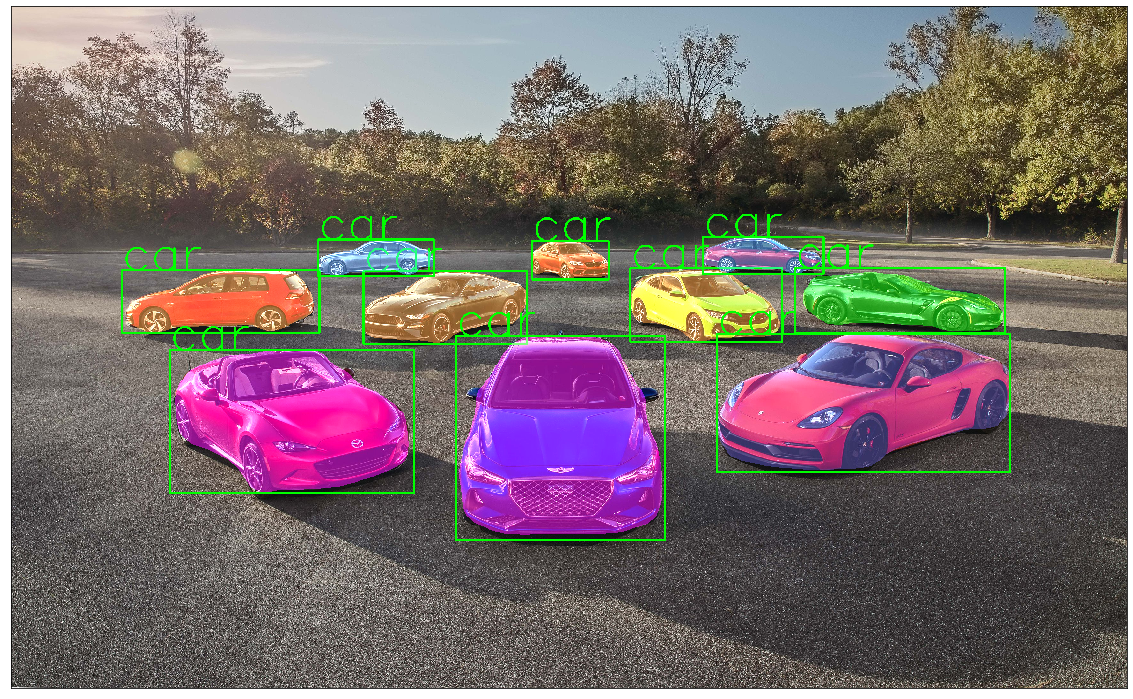

In [10]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O mrcnn_cars.jpg
instance_segmentation_api('./mrcnn_cars.jpg', 0.9, rect_th=5, text_size=5, text_th=5)

--2019-10-14 16:28:16--  https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.141.87, 104.18.82.97, 2606:4700::6812:5261, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.141.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253264 (247K) [image/jpeg]
Saving to: ‘mrcnn_traffic.jpg’

mrcnn_traffic.jpg   100%[===================>] 247.33K  --.-KB/s    in 0.05s   

2019-10-14 16:28:17 (5.21 MB/s) - ‘mrcnn_traffic.jpg’ saved [253264/253264]



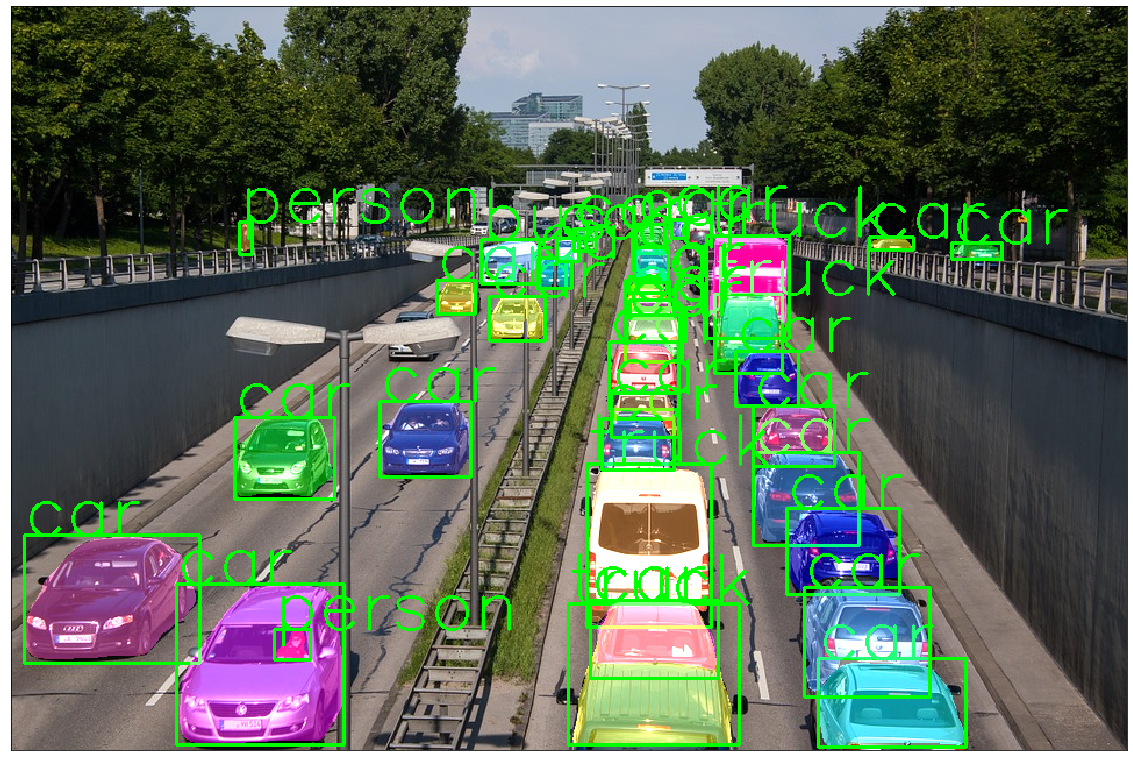

In [11]:
!wget https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O mrcnn_traffic.jpg
instance_segmentation_api('./mrcnn_traffic.jpg', 0.6, rect_th=2, text_size=2, text_th=2)

--2019-10-14 16:28:36--  https://images.unsplash.com/photo-1475505035646-a4680971b0fb
Resolving images.unsplash.com (images.unsplash.com)... 151.101.42.208, 2a04:4e42:a::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.42.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9711443 (9.3M) [binary/octet-stream]
Saving to: ‘mrcnn_playing.jpg’

mrcnn_playing.jpg   100%[===================>]   9.26M  27.3MB/s    in 0.3s    

2019-10-14 16:28:37 (27.3 MB/s) - ‘mrcnn_playing.jpg’ saved [9711443/9711443]



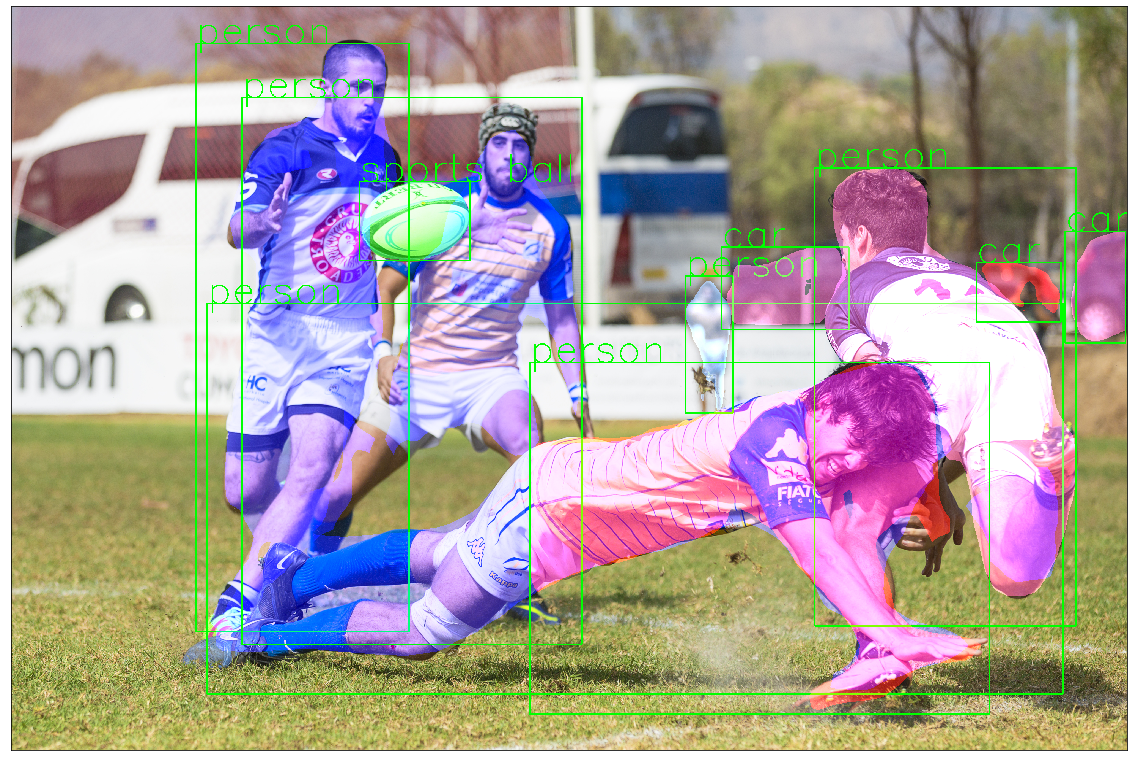

In [12]:
!wget https://images.unsplash.com/photo-1475505035646-a4680971b0fb -O mrcnn_playing.jpg
instance_segmentation_api('./mrcnn_playing.jpg', 0.8, rect_th=6, text_size=6, text_th=6)

--2019-10-14 16:29:36--  https://www.westelm.com/weimgs/rk/images/wcm/products/201922/0251/smeg-full-size-refrigerator-o.jpg
Resolving www.westelm.com (www.westelm.com)... 172.231.9.46
Connecting to www.westelm.com (www.westelm.com)|172.231.9.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89766 (88K) [image/jpeg]
Saving to: ‘mrcnn_ketchen.jpg’

mrcnn_ketchen.jpg   100%[===================>]  87.66K  --.-KB/s    in 0.008s  

2019-10-14 16:29:46 (10.6 MB/s) - ‘mrcnn_ketchen.jpg’ saved [89766/89766]



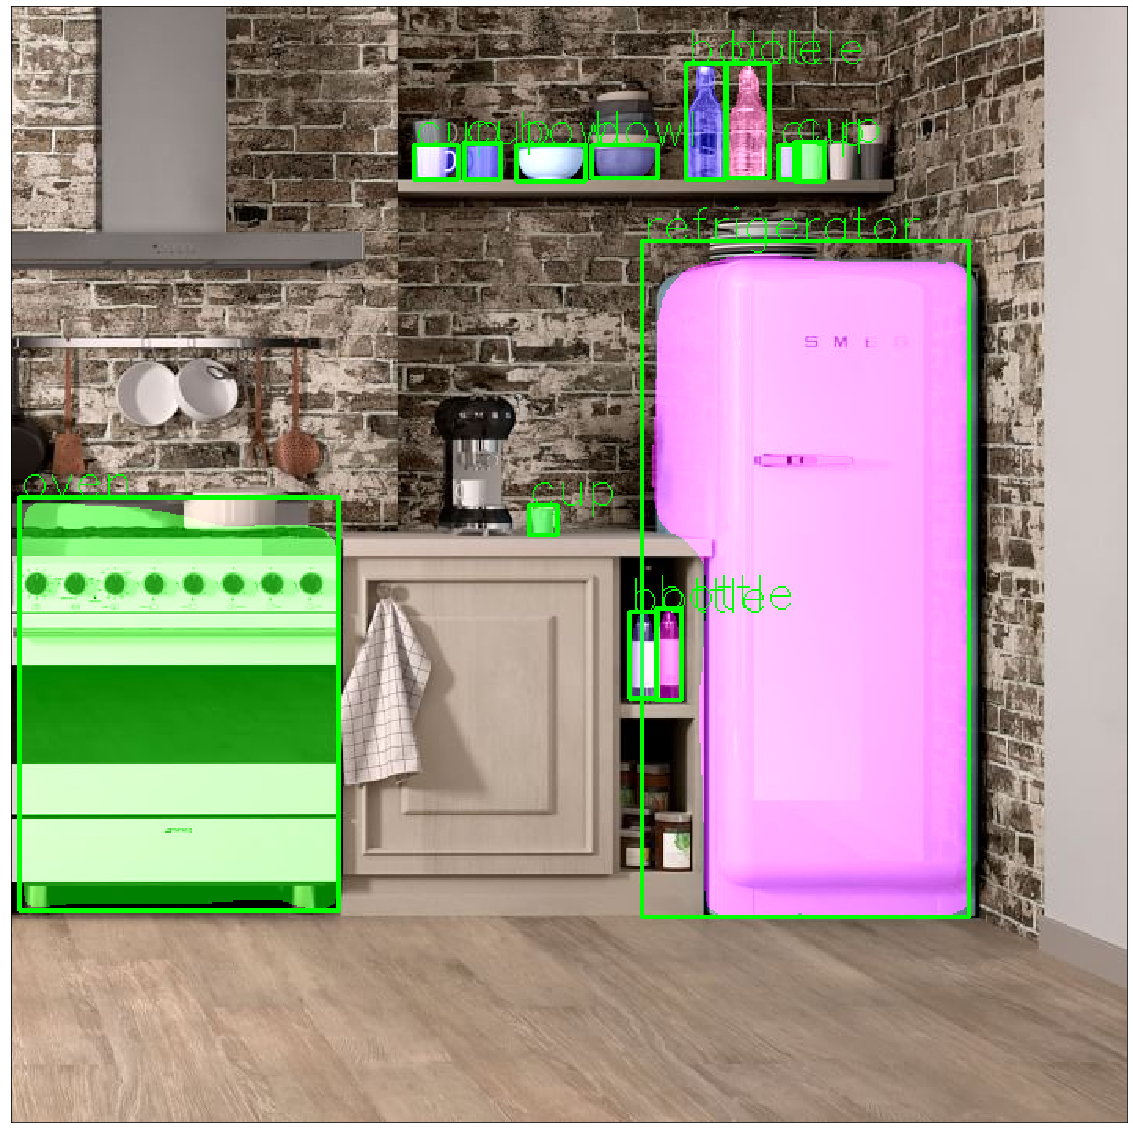

In [17]:
!wget https://www.westelm.com/weimgs/rk/images/wcm/products/201922/0251/smeg-full-size-refrigerator-o.jpg -O mrcnn_ketchen.jpg
instance_segmentation_api('./mrcnn_ketchen.jpg', 0.8, rect_th=2, text_size=1, text_th=1)